In [1]:
# specify project directory in google drive
project_dir = '/content/drive/MyDrive/MyProjects/garbage_img_classification'

# specify test dataset directory
predict_img_dir = '/content/drive/MyDrive/MyProjects/garbage_img_classification/predict_img'


# Garbage Image Classification

## Objective 
To classify type of garbage in an image.  
This dataset contains 6 types of garbage;  
- cardboard (393 images)  
- glass (491 images)  
- metal (400 images)  
- paper (584 images)  
- plastic (472 images)  
- trash (127 images)

## Dataset
source : https://www.kaggle.com/asdasdasasdas/garbage-classification

## Make Prediction
From the performance of 3 model development 
- CNN model : 0.7076566125290024
- vgg-block model : 0.7679814385150812
- pre-trained VGG16 model : 0.8352668213457076
- pre-trained ResNet50 : 0.8584686774941995

I choose the last model, which use pre-trained Keras ResNet50 model as a feature extractor with additional classifier layer, to make a prediction.

### Load the model

In [35]:
model_name = 'best_pretrained_resnet50.h5'

In [32]:
from tensorflow.keras.models import load_model

In [36]:
model = load_model(project_dir+'/'+model_name)

In [37]:
# see model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

### Load label dict from json file

In [6]:
import json

In [7]:
labels_dict = json.load(open(project_dir+'/labels_dict.json'))
labels_dict

{'0': 'cardboard',
 '1': 'glass',
 '2': 'metal',
 '3': 'paper',
 '4': 'plastic',
 '5': 'trash'}

### Load image for making prediction

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import preprocess_input

In [39]:
# let's see images we have
os.listdir(predict_img_dir)

['metal75.jpg',
 'cardboard55.jpg',
 'paper33.jpg',
 'metal246.jpg',
 'plastic251.jpg',
 'paper208.jpg',
 'glass354.jpg',
 'plastic328.jpg',
 'cardboard261.jpg',
 'glass297.jpg',
 'trash100.jpg',
 'trash75.jpg']

In [44]:
# get random image
img_name = os.listdir(predict_img_dir)[np.random.randint(len(os.listdir(predict_img_dir)))]
img_name

'metal75.jpg'

File name :  metal75.jpg


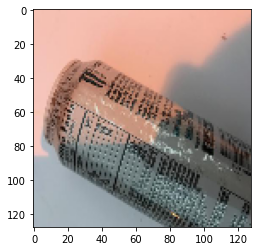

In [45]:
# load image with target size = (128, 128)
original_img = load_img(predict_img_dir+'/'+img_name, target_size=(128,128))

# plot image
print('File name : ', img_name)
plt.imshow(original_img)
plt.show()

### Image preprocessing for ResNet50 input

In [55]:
# convert img to array
img = img_to_array(original_img)
img.shape

(128, 128, 3)

In [56]:
# reshape image to be a single sample with 3 chanels
img = img.reshape(1, 128, 128, 3)
img.shape

(1, 128, 128, 3)

In [57]:
# chang type to float32
img = img.astype('float32')
img.dtype

dtype('float32')

In [58]:
# center pixel data as for pretrained ResNet50
img = preprocess_input(img)

### Make prediction

In [59]:
result = model.predict(img)
result[0]

array([4.43776127e-09, 1.02323055e-01, 8.97643507e-01, 2.17794968e-05,
       1.15522425e-05, 3.80964487e-08], dtype=float32)

In [60]:
# map result to label
label_result = labels_dict[str(result[0].argmax())]
label_result

'metal'

File name :  metal75.jpg


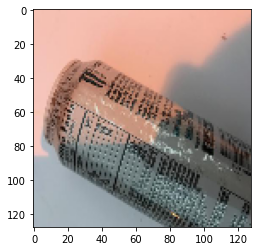

Prediction result :  metal


In [61]:
# show the prediction
print('File name : ', img_name)
plt.imshow(original_img)
plt.show()
print('Prediction result : ', label_result)

### Make prediction of all images in the folder

In [62]:
# let's see images we have
os.listdir(predict_img_dir)

['metal75.jpg',
 'cardboard55.jpg',
 'paper33.jpg',
 'metal246.jpg',
 'plastic251.jpg',
 'paper208.jpg',
 'glass354.jpg',
 'plastic328.jpg',
 'cardboard261.jpg',
 'glass297.jpg',
 'trash100.jpg',
 'trash75.jpg']

In [68]:
img_list = list()

for img in os.listdir(predict_img_dir):
  # load image with target size = (128, 128)
  img = load_img(predict_img_dir+'/'+img, target_size=(128,128))
  # convert img to array
  img = img_to_array(img)
  # append image array to image list
  img_list.append(img)

# convert image list to array
img_array = np.array(img_list)
# change dtype to float32
img_array = img_array.astype('float32')
# preprocess images to be ResNet50 input
img_array = preprocess_input(img_array)

# print shape
img_array.shape

(12, 128, 128, 3)

In [69]:
# make batch prediction
results = model.predict(img_array)
results

array([[4.43783366e-09, 1.02320515e-01, 8.97646129e-01, 2.17795805e-05,
        1.15522862e-05, 3.80963421e-08],
       [1.00000000e+00, 1.25794557e-13, 1.28501090e-14, 4.27847341e-11,
        4.28427953e-11, 2.14226279e-17],
       [5.68566136e-02, 1.09650944e-09, 6.50650645e-06, 9.43129539e-01,
        1.30261657e-09, 7.31395448e-06],
       [3.81886700e-09, 5.78725303e-05, 9.99801934e-01, 1.11151770e-04,
        2.88542433e-05, 5.63496272e-08],
       [2.88821788e-12, 5.98916959e-04, 5.46591465e-08, 3.66910813e-09,
        9.99400973e-01, 9.68703562e-10],
       [5.28412271e-15, 4.43512164e-07, 2.28386685e-11, 9.99999404e-01,
        7.88776475e-11, 1.12279125e-07],
       [2.20428631e-09, 9.31327045e-01, 5.93304003e-06, 1.92432344e-06,
        6.86650351e-02, 3.32906036e-10],
       [5.18998222e-09, 2.02954354e-04, 4.97225813e-07, 2.42021461e-08,
        9.99796569e-01, 1.68954664e-08],
       [9.43693519e-01, 1.23542676e-09, 4.06808454e-08, 5.63059002e-02,
        1.93056149e-08, 

In [70]:
prediction = results.argmax(axis=1)
prediction

array([2, 0, 3, 2, 4, 3, 1, 4, 0, 1, 5, 5])

In [71]:
prediction_label = [labels_dict[str(i)] for i in prediction]
prediction_label

['metal',
 'cardboard',
 'paper',
 'metal',
 'plastic',
 'paper',
 'glass',
 'plastic',
 'cardboard',
 'glass',
 'trash',
 'trash']

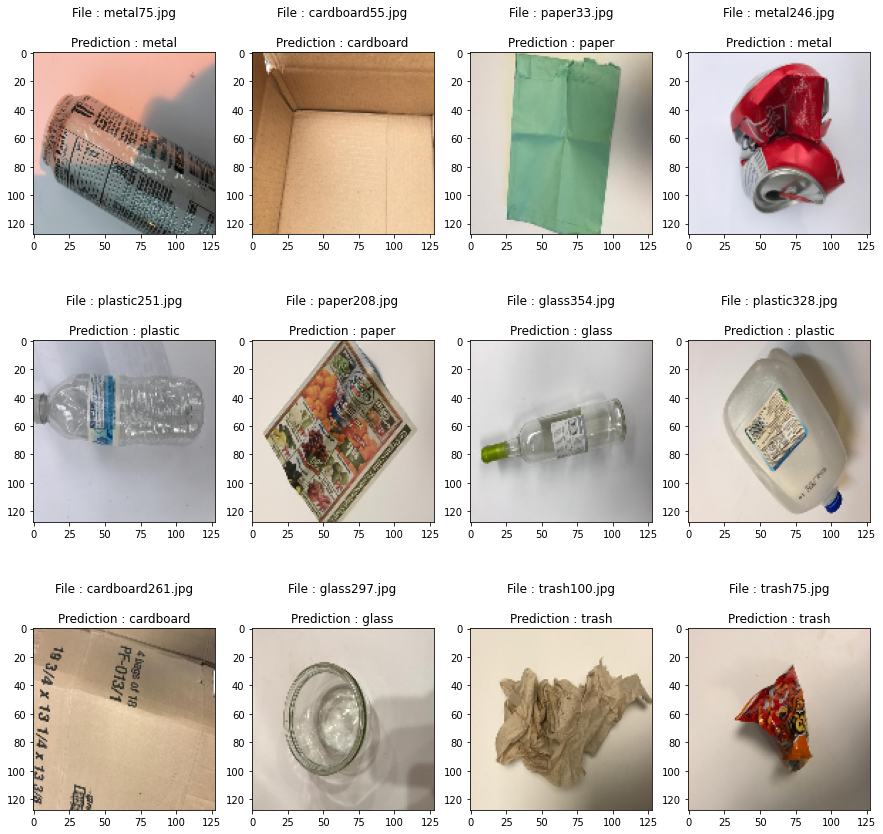

In [72]:
# plot images along with their prediction
fig = plt.figure(figsize=(15,15))
for i,image in enumerate(os.listdir(predict_img_dir)):
  img = load_img(predict_img_dir+'/'+image, target_size=(128,128))
  fig.add_subplot(3,4, i+1)
  plt.imshow(img)
  plt.title('File : '+image+'\n\nPrediction : '+ prediction_label[i])

#fig.tight_layout()
plt.show()

The model can predict all correctly.